## Plotting ufloats

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import uncertainties as unc
from scipy import stats

In [13]:
stats.norm.pdf(0.17, loc=0, scale=1) - stats.norm(0,1).pdf(0.17)

0.0

In [2]:
# test dataset
vs = []
for i in range(100):
    vs.append(unc.ufloat(np.random.uniform(0,1), np.random.uniform(0.001, 0.2)))
vs = np.array(vs)

In [36]:
def plot(*args, ax=None, **kwargs):
    '''
    Quick interface to the plt.errorbar function:
    
    Parameters:
        *args:
            x: optinal, if given array-like. If it is an array of ufloats xerrorbars are plotted
            y: array-like. If it is an array of ufloats xerrorbars are plotted
        
        ax: optional, axis on which to execute the plot
        
        **kwargs: passed to plt.errorbar, e.g. 'fmt'
        
    Returns: ErrorbarContainer
        
    '''
    if len(args) == 2:
        xs = args[0]
        ys = args[1]
    else:
        ys = args[0]
        xs = np.arange(len(ys))
    if type(xs[0]) == unc.core.Variable:
        x_d = np.array([[x.n, x.s] for x in xs])
        x_val = x_d[:,0]
        x_err = x_d[:,1]
    else:
        x_val = xs
        x_err = None
    
    if type(ys[0]) == unc.core.Variable:
        y_d = np.array([[y.n, y.s] for y in ys])
        y_val = y_d[:,0]
        y_err = y_d[:,1]
    else:
        y_val = ys
        y_err = None
    
    if ax is not None:
        return ax.errorbar(x_val, y_val, xerr=x_err, yerr=y_err, **kwargs)
    return plt.errorbar(x_val, y_val, xerr=x_err, yerr=y_err, **kwargs)



class ExtendedKDE():
    def __init__(self, xs):
        x_d = np.array([[x.n, x.s] for x in xs])
        x_val = x_d[:,0]
        x_err = x_d[:,1]
        
        min_idx = np.argmin(x_val)
        max_idx = np.argmax(x_val)
        self.min_x = x_val[min_idx] - 2*x_err[min_idx]
        self.max_x = x_val[max_idx] + 2*x_err[max_idx]
        
        self.gaussians = [stats.norm(*p) for p in x_d]
        
    def __call__(self, point):
        return np.sum([g.pdf(point) for g in self.gaussians])
    
    def evaluate(self, points):
        '''
        Performs a kde histogram of ufloat data

        Parameters:
            points: int or array-like:
                if int: number of points that are computed
                if array-like: array of points where to sample
        '''
        return points, np.array([self(point) for point in tqdm(points)])
    

    def plot(self, points=30, ax=None, xrange=None, **kwargs):
        '''
        Performs a kde histogram of ufloat data

        Parameters:
            points: int or array-like:
                if int: number of points that are computed
                if array-like: array of points where to sample
            ax: optional, axis on which to execute the plot
        '''
        if type(points) == int:
            if xrange is not None:
                points = np.linspace(*xrange, points)
            else:
                points = np.linspace(self.min_x, self.max_x, points)
            
        points, values = self.evaluate(points)
        
        if ax is not None:
            ax.plot(points,values, **kwargs)
        else:
            plt.plot(points,values, **kwargs)

        return points, values

<ErrorbarContainer object of 3 artists>

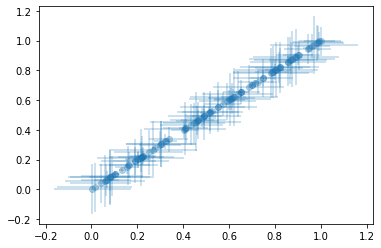

In [7]:
fig, ax = plt.subplots()
plot(vs, vs, ax=ax, fmt='o', alpha=0.3)

In [37]:
kernel = ExtendedKDE(vs)

<IPython.core.display.Javascript object>


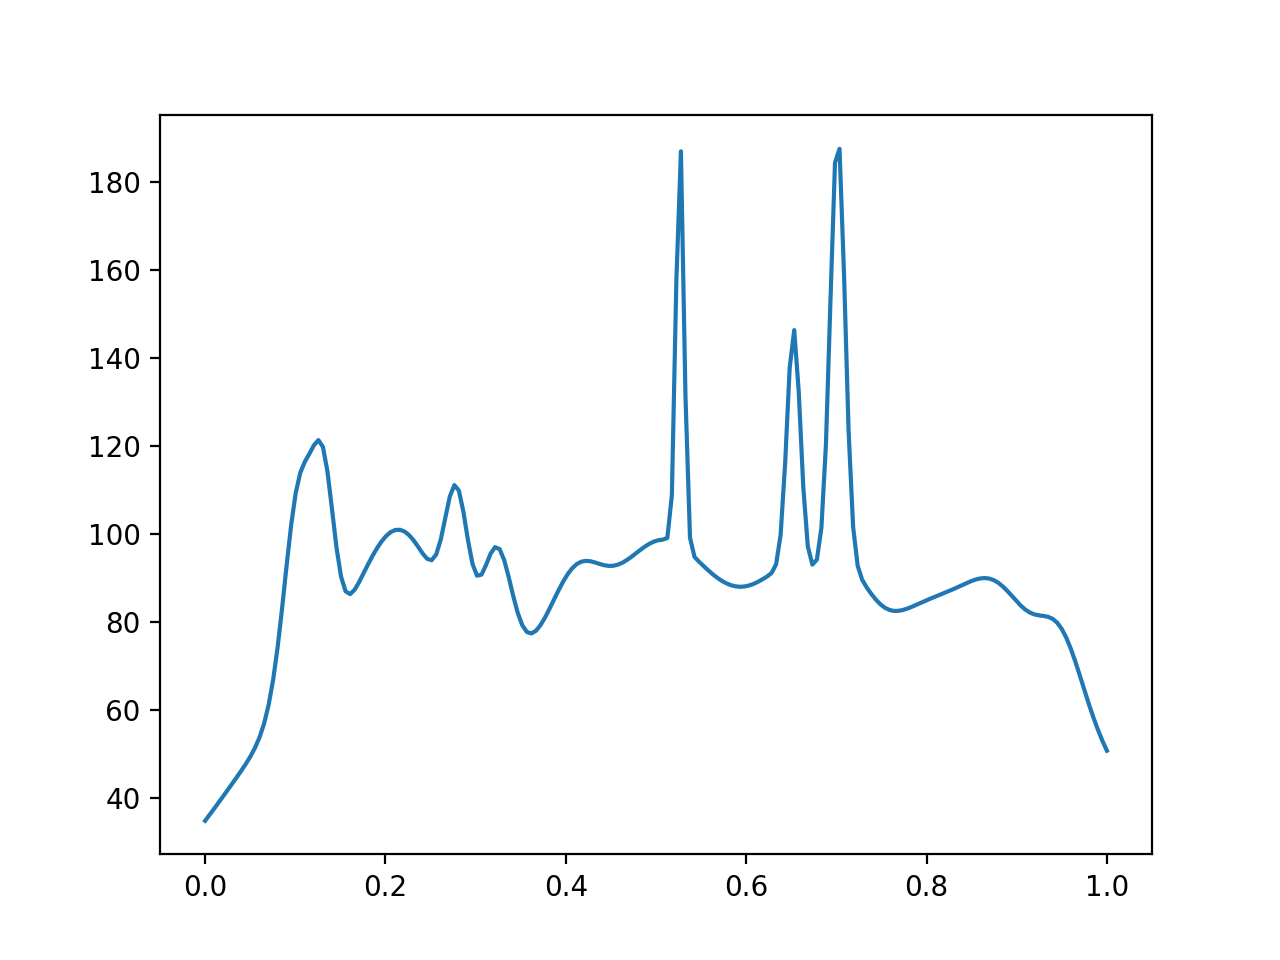

100%|██████████| 200/200 [00:02<00:00, 66.69it/s]


In [38]:
%matplotlib notebook
plt.figure()
_ = kernel.plot(points=200, xrange=(0,1))

In [28]:
# plt.figure()
plt.hist([v.n for v in vs], bins=200, weights=[1/v.s for v in vs])

(array([  5.94405439,   0.        ,   6.09905807,   0.        ,
          0.        ,   0.        ,   0.        ,   7.46121515,
          0.        ,   0.        ,   0.        ,   5.71622119,
         27.40500967,   0.        ,   0.        ,  22.09389771,
          0.        ,   7.37496546,   0.        ,   0.        ,
        117.68043658,   0.        ,   0.        ,   0.        ,
          0.        ,  84.73997711,   0.        ,   0.        ,
          0.        ,   0.        ,  18.99982654,   7.69684194,
         11.26051332,   0.        ,   0.        ,   0.        ,
          0.        ,  17.47998617,   0.        ,  17.17418249,
         21.75700218,   0.        ,  15.03372562,  53.61156158,
         17.69179987,   0.        ,   0.        ,   0.        ,
          0.        ,   6.64973893,   0.        ,   0.        ,
          0.        ,   5.18413594,   0.        ,  77.4917423 ,
          0.        ,   0.        ,   0.        ,  11.02372156,
         12.94919   ,   0.        ,   0.